<a href="https://colab.research.google.com/github/NeerajHazarika/ENITS_DataMining_WS24/blob/main/Week_4/Assignment_4_1_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment II: Clustering

In [ ]:
import pandas as pd

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [ ]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 126 (delta 11), reused 39 (delta 11), pack-reused 87 (from 1)
Receiving objects: 100% (126/126), 185.56 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (86/86), done.


In [ ]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Task 1: clean the data and perform a basic EDA
* check for missing values and NAN
* compute basic statistics
* check for carrelations in the data

check for missing values and NAN

In [ ]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
data.shape

(8950, 18)

compute basic statistics

In [ ]:
print(data.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

handling missing data

In [ ]:
mean_minimum_payments = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(value=mean_minimum_payments)

In [ ]:
mean_credit_limit = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(value=mean_credit_limit)

check for carrelations in the data

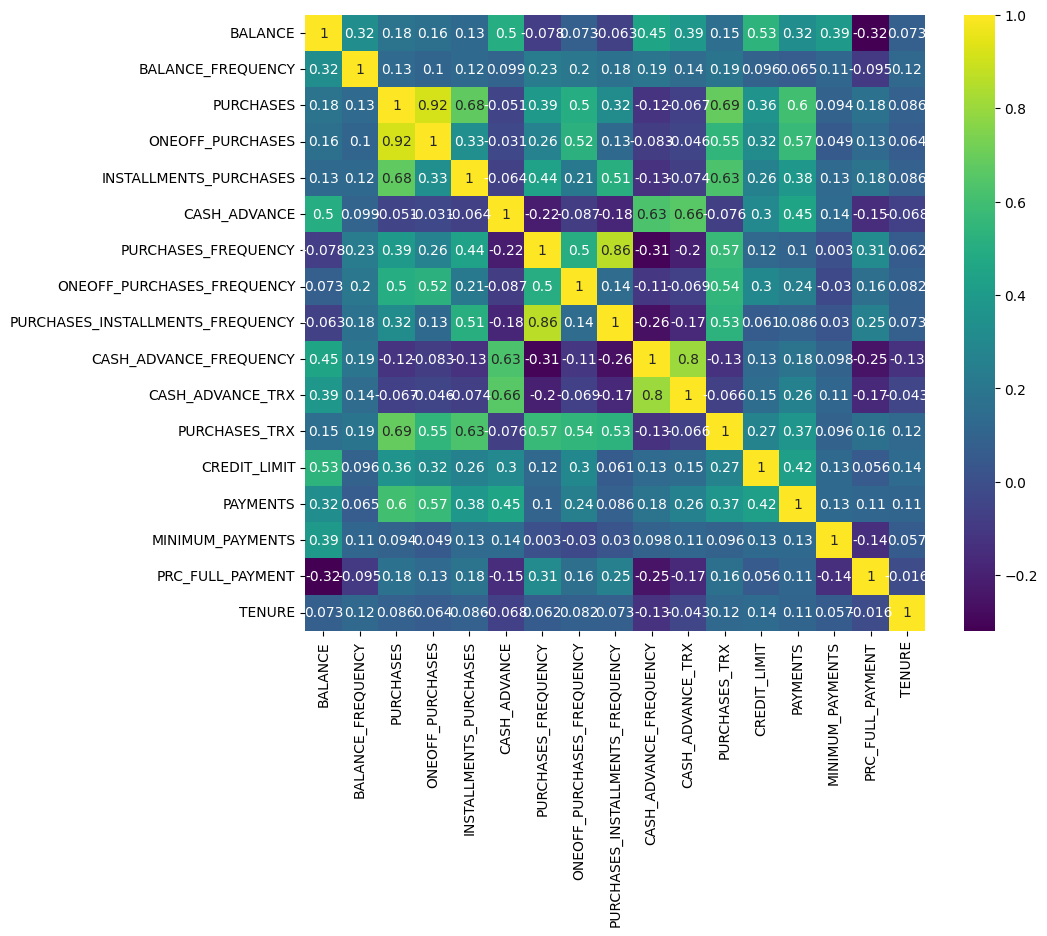

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')
plt.show()

### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these groups.
* use a Scikit-Learn clustering *K-Means* and *DBSCAN* clustering to group the users
* analyze the key differences between the user groups: use simple statistics

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# relevant features for clustering on the basis corelation (not highly corelated, not highly uncorelated, balanced)
features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

for i in range(k):
    cluster_data = data[data['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data.describe())
    print("\n")

Cluster 0:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1166.000000        1166.000000   1166.000000       1166.000000   
mean    5273.631450           0.979128    743.432985        477.082950   
std     2433.106173           0.077422   1291.952778       1040.819962   
min      166.295463           0.181818      0.000000          0.000000   
25%     3625.454888           1.000000      0.000000          0.000000   
50%     4857.301563           1.000000    218.720000          0.000000   
75%     6431.174354           1.000000    971.175000        491.500000   
max    18495.558550           1.000000  12650.000000      12650.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1166.000000   1166.000000          1166.000000   
mean               266.407453   3146.553882             0.361837   
std                547.129645   2396.010302             0.391807   
min                  0.000000      0.000000       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

for i in sorted(data['dbscan_cluster'].unique()):
    if i == -1:
        cluster_label = "Noise"
    else:
        cluster_label = f"Cluster {i}"
    cluster_data = data[data['dbscan_cluster'] == i]
    print(f"{cluster_label}:")
    print(cluster_data.describe())
    print("\n")

Noise:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1746.000000        1746.000000   1746.000000       1746.000000   
mean    3692.255023           0.943319   2826.054462       1788.025241   
std     3024.863224           0.162012   4112.866080       3320.344360   
min        0.000000           0.000000      0.000000          0.000000   
25%     1276.647429           1.000000    343.500000          0.000000   
50%     3008.164266           1.000000   1674.535000        672.240000   
75%     5346.120066           1.000000   3846.087500       2367.410000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1746.000000   1746.000000          1746.000000   
mean              1038.423809   2657.199315             0.635279   
std               1714.865257   3788.665909             0.399063   
min                  0.000000      0.000000           